# Лабораторная №4

- Выбор варианта
  - Четный номер в группе - Датасет о вине (https://www.kaggle.com/datasets/davorbudimir/winedataset)

In [ ]:
import csv
import numpy as np
import pandas as pd
from random import shuffle

with open("WineDataset.csv") as f:
    data = list(csv.reader(f))

# convert to float
for i in range(1, len(data)):
    data[i] = np.array(list(map(float, data[i])))

df = pd.DataFrame(data[1:6], columns=data[0])
display(df)

headers = data[0]
data = data[1:]
shuffle(data)

data = np.transpose(data) # записать данные по столбцам

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


- Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.

In [ ]:
import matplotlib.pyplot as plt

count = len(data[1])

minValues = [min(column) for column in data]
maxValues = [max(column) for column in data]
average = [sum(column)/count for column in data]

count = 178


,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.34000,0.130000,0.410000,1.28000,0.480000,1.270000,278.000000,1.000000
avg,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,1.938202
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.08000,0.660000,3.580000,13.00000,1.710000,4.000000,1680.000000,3.000000


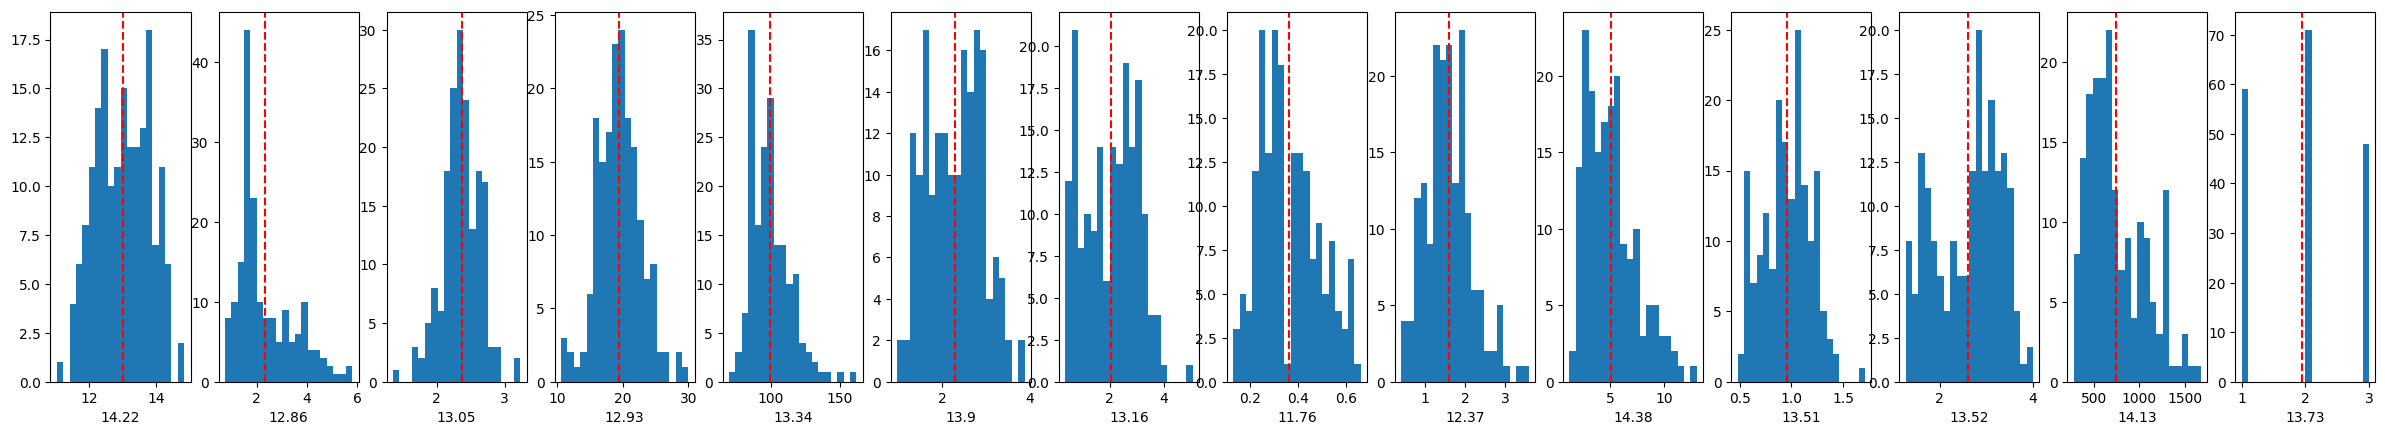

In [35]:
print(f"count = {count}")
display(pd.DataFrame([minValues, average, maxValues], columns=headers, index=["min", "avg", "max"]))

plt.figure().set_figwidth(30)

for i in range(14):
    plt.subplot(1,14,i+1) 
    plt.hist(data[i], bins=20)
    plt.axvline(average[i], color='red', linestyle='dashed')
    plt.xlabel(data[0][i])
    
plt.show()

- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.

Min/max scaling: 
$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

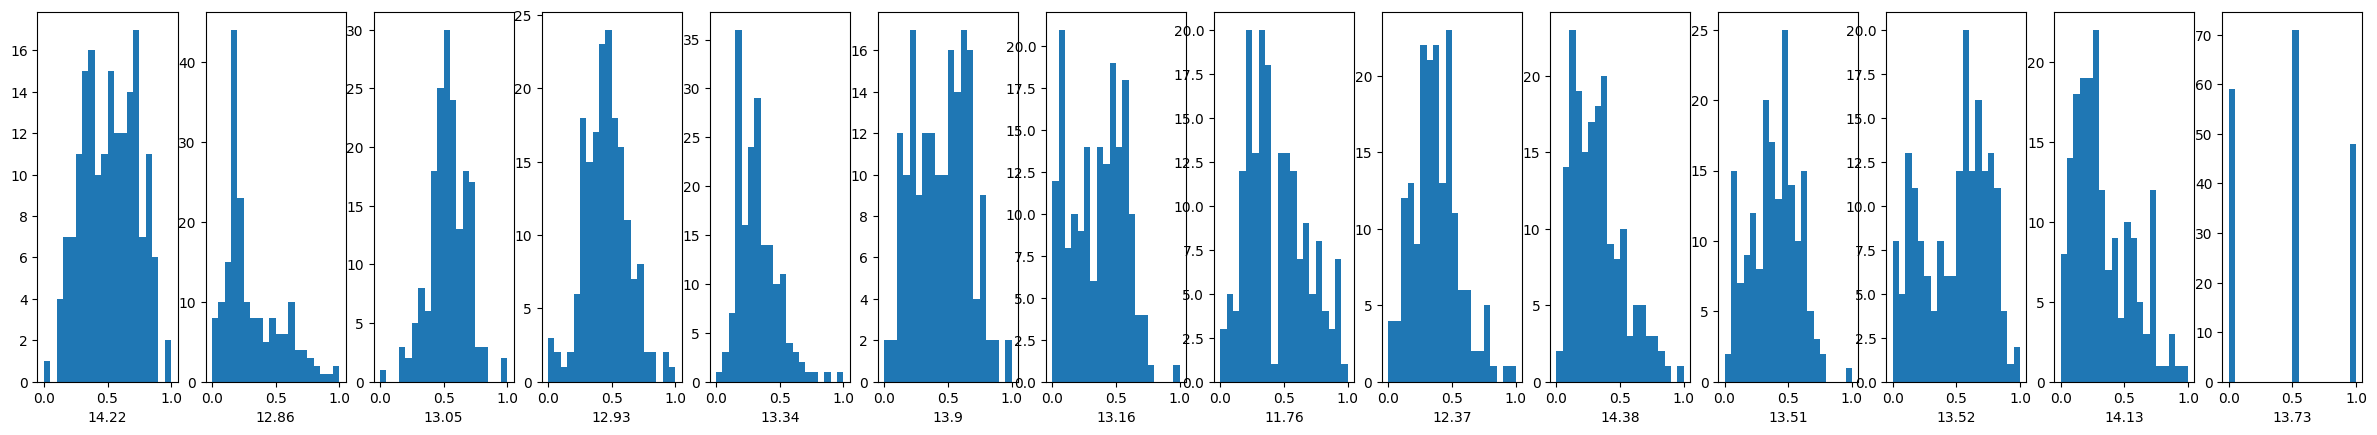

In [34]:
enhancedData = [[99] * count for _ in range(len(data))] 

for i in range(len(data)):
    column = data[i]
    minVal = minValues[i]
    maxVal = maxValues[i]
    for j in range(len(data[i])):
        enhancedData[i][j] = (data[i][j] - minVal) / (maxVal - minVal)

plt.figure().set_figwidth(30)   
for i in range(14):
    plt.subplot(1,14,i+1) 
    plt.hist(enhancedData[i], bins=20)
    plt.xlabel(data[0][i])
    
plt.show()

- Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.

Евклидово расстояние:
$ d(a,b)=\sqrt{\sum_{i=1}^{n}{(a_i-b_i)^2}} $

In [ ]:
# евклидово расстояние между 2 многомерными точками
def distance(a, b, targetParameterIndex):
    dist = 0
    for i in range (len(a)):
        if i != targetParameterIndex: # не учитываем искомый параметр, так как цель - как раз его найти (у нас его как-будто нет) 
            dist += (a[i] - b[i]) ** 2
    return dist**0.5

# Вычислить массив расстояний от точки controlPoint до каждой точки 
# из массива признаков testPoints
# Возвращает кортеж: (значение_искомого_параметра_у_точки, расстояние_до_точки)
def getAllDistances(testPoints, controlPoint, targetParameterIndex):
    distances = []
    for i in range(len(testPoints)):
        dist = distance(testPoints[i], controlPoint, targetParameterIndex)
        distances.append((testPoints[i][targetParameterIndex], dist))
    return distances

# Вычислить расстояния от контрольной точки до всех остальных точек выборки
def getNearestNeighbors(testPoints, controlPoint, targetParameterIndex, k):
    distances = getAllDistances(testPoints, controlPoint, targetParameterIndex)
    distances.sort(key=lambda x: x[1])
    return distances[:k] # k ближайших соседей


def predict(testPoints, controlPoint, targetParameterIndex, k):
    neighbors = getNearestNeighbors(testPoints, controlPoint, targetParameterIndex, k)
    
    predictedValue = np.average([n[0] for n in neighbors]) # усредненное значение соседей
    
    return predictedValue;


In [24]:
# тестируем модель
testData = np.transpose([column[:int(count*0.3)] for column in enhancedData])
trainData = np.transpose([column[int(count*0.3):] for column in enhancedData])

predictedParameterIndex = 13 # Wine type

predictions = []
for i in range(len(testData)):
    result = predict(trainData, testData[i], predictedParameterIndex, 5)
    real = testData[i][predictedParameterIndex]
    
    predictions.append((result, real))
    # print(f"predict: {result}; real: {real}")
    

    

// todo: модель-1, модель-2

- Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок

Матрица ошибок: 

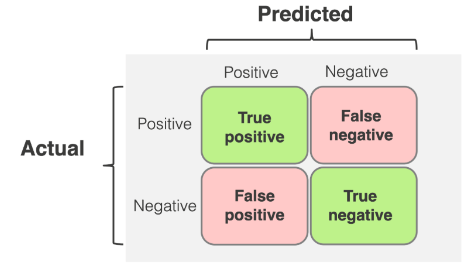
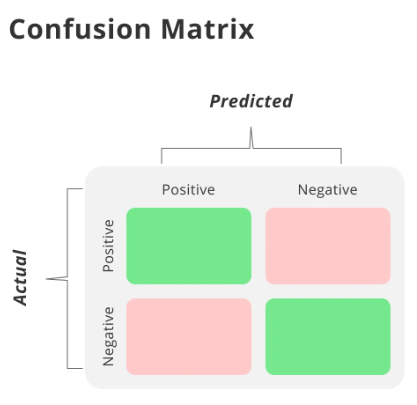

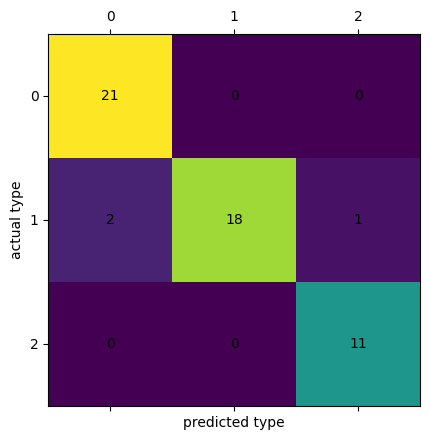

In [ ]:
confusionMatrix = [[0,0,0], 
                   [0,0,0], 
                   [0,0,0]]

for pred, actual in predictions:
    actualType = int(actual*2)
    predictedType = round(pred*2)
    confusionMatrix[actualType][predictedType] += 1
    # print(round(pred*2), actual*2)
    
# print(confusionMatrix)
    
plt.matshow(confusionMatrix)
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(confusionMatrix[i][j]), ha='center', va='center')
plt.xlabel("predicted type")
plt.ylabel("actual type")
plt.show()